# Exploring the Data


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [69]:
### Reading train and test data ###
test_df= pd.read_csv('unfinished.csv', sep=',', header=0)
train_df= pd.read_csv('finished.csv', sep=',', header=0)

# data column types
train_df.info()

# what the data looks like
train_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164399 entries, 0 to 164398
Data columns (total 15 columns):
backers_count            164399 non-null int64
category                 164399 non-null object
country                  164399 non-null object
creator                  164399 non-null int64
currency                 164399 non-null object
disable_communication    164399 non-null bool
goal                     164399 non-null float64
is_starrable             164399 non-null bool
staff_pick               164399 non-null bool
state                    164399 non-null int64
urls                     164399 non-null object
usd_pledged              164399 non-null float64
location                 164399 non-null object
blurb_length             164399 non-null int64
duration                 164399 non-null int64
dtypes: bool(3), float64(2), int64(5), object(5)
memory usage: 15.5+ MB


,backers_count,category,country,creator,currency,disable_communication,goal,is_starrable,staff_pick,state,urls,usd_pledged,location,blurb_length,duration
0,80,art/mixed media,US,483835381,USD,False,2800.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,3596.0,"Paonia, CO",21,21
1,47,art,US,1536850207,USD,False,3900.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,4117.0,"Bakersfield, CA",26,23
2,80,art/painting,US,2039713907,USD,False,750.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,3125.0,"Lowell, MA",12,19
3,82,art/public art,US,17146650,USD,False,4500.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,4586.0,"Washington, DC",20,40
4,31,art/painting,US,1442314751,USD,False,1000.0,False,False,1,{'project': 'https://www.kickstarter.com/proje...,1036.0,"Portland, OR",10,5


In [70]:
### merging train and test data for exploration ###
# you can tell apart test and train data from the status column
df = pd.concat([train_df, test_df], ignore_index=True)

In [71]:
### describing the numerical values of the data ###
df.describe()
### describing non-numerical values of the data ###
df.describe(exclude=[np.number])

,backers_count,creator,goal,usd_pledged,blurb_length,duration
count,168344.000000,1.683440e+05,1.683440e+05,1.683440e+05,168344.000000,168344.000000
mean,135.645957,1.073365e+09,4.126582e+04,1.115025e+04,19.389559,33.527117
std,950.459713,6.199783e+08,1.126406e+06,8.341868e+04,4.797241,12.706554
min,0.000000,3.000000e+00,1.000000e-02,0.000000e+00,0.000000,1.000000
25%,3.000000,5.371819e+08,1.570310e+03,1.000000e+02,17.000000,30.000000
50%,25.000000,1.072871e+09,5.000000e+03,1.426000e+03,20.000000,30.000000
75%,81.000000,1.610313e+09,1.250000e+04,5.892309e+03,23.000000,35.000000
max,105857.000000,2.147465e+09,1.523501e+08,1.026685e+07,35.000000,92.000000


,category,country,currency,disable_communication,is_starrable,staff_pick,state,urls,location
count,168344,168344,168344,168344,168344,168344,168344,168344,168344
unique,168,22,14,1,2,2,3,168344,13946
top,publishing/fiction,US,USD,False,False,False,1,{'project': 'https://www.kickstarter.com/proje...,"Los Angeles, CA"
freq,2400,133380,133380,168344,164641,146200,91355,1,8534


### backers_count

- The number of people who have backed the project
- Most projects have less than 100 backers
- Amount of projects with more than 10 000 backers is 146

count    168344.000000
mean        135.645957
std         950.459713
min           0.000000
25%           3.000000
50%          25.000000
75%          81.000000
max      105857.000000
Name: backers_count, dtype: float64

146

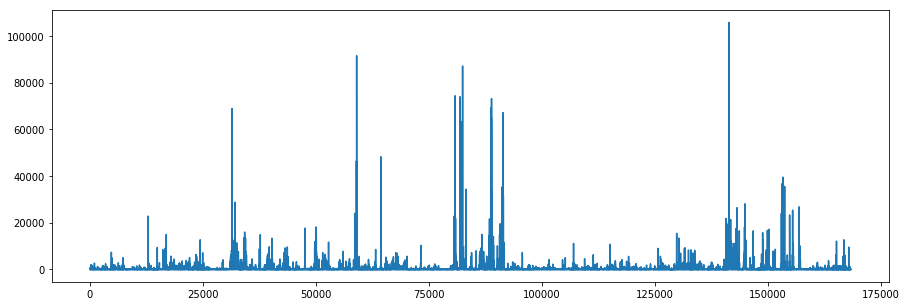

In [72]:
df.backers_count.describe()
df.backers_count.plot(figsize=(15,5))

# projects with more than 10000 backers
len(df.backers_count[df.backers_count > 10000])

### creator

- The user ID of the creator of the project as numerical value
- 21165 creators (out of 147179) have created more than 1 project

In [73]:
# show 10 first creators in data
df.creator[:10]
# number of projects
len(df.creator)
# number of unique project creators
len(df.creator.unique())
print("{:d} creators have created more than 1 project".format((len(df.creator)-len(df.creator.unique()))))

0     483835381
1    1536850207
2    2039713907
3      17146650
4    1442314751
5    1467369751
6    1078130915
7    1044092769
8     973860748
9    1367577087
Name: creator, dtype: int64

168344

147179

21165 creators have created more than 1 project


### goal

- The monetary goal for the project, when reached the project is considered successful
- Majority of the projects have a goal of less than 15000 with half of them having a goal of 5000 or less
- Projects with a goal of 1 million USD are uncommon

TODO: Standardize ?

count    1.683440e+05
mean     4.126582e+04
std      1.126406e+06
min      1.000000e-02
25%      1.570310e+03
50%      5.000000e+03
75%      1.250000e+04
max      1.523501e+08
Name: goal, dtype: float64

goal over 1 mil: 554


46

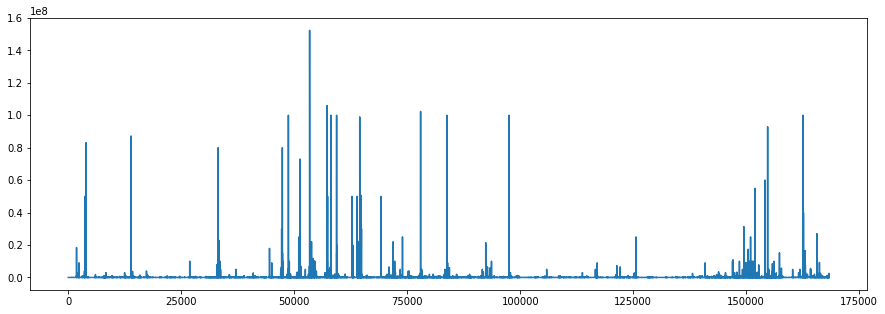

In [74]:
df.goal.describe()
df.goal.plot(figsize=(15,5))

# projects with goal of 1 million or more
print("goal over 1 mil: {:d}".format(len(df.goal[df.goal >= 1000000])))

#projects with a goal more than 20 million USD
len(df.goal[df.goal >= 20000000])

### usd_pledged

- The amount of money raised in USD
- 156 projects managed to get more than 1 million in backing and only 9 with more than 5 mil
- Most projects gained less than 6000 USD
- 3 projects gained enough backing but were considered unsuccessful (why?)

count    1.683440e+05
mean     1.115025e+04
std      8.341868e+04
min      0.000000e+00
25%      1.000000e+02
50%      1.426000e+03
75%      5.892309e+03
max      1.026685e+07
Name: usd_pledged, dtype: float64

156

9

3

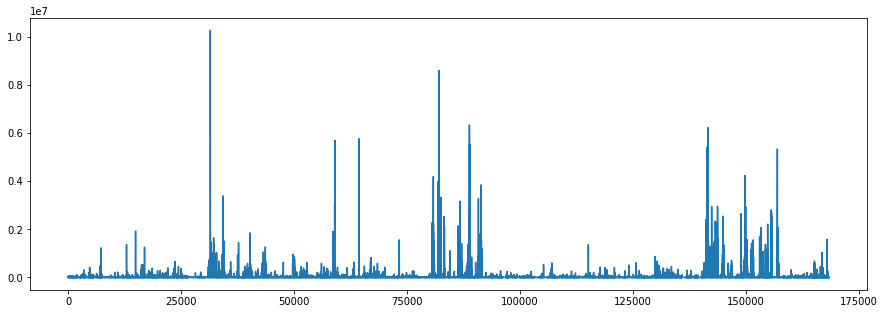

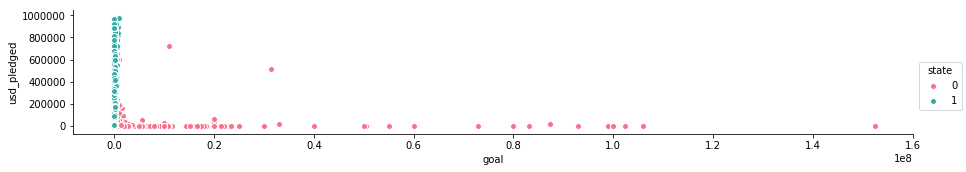

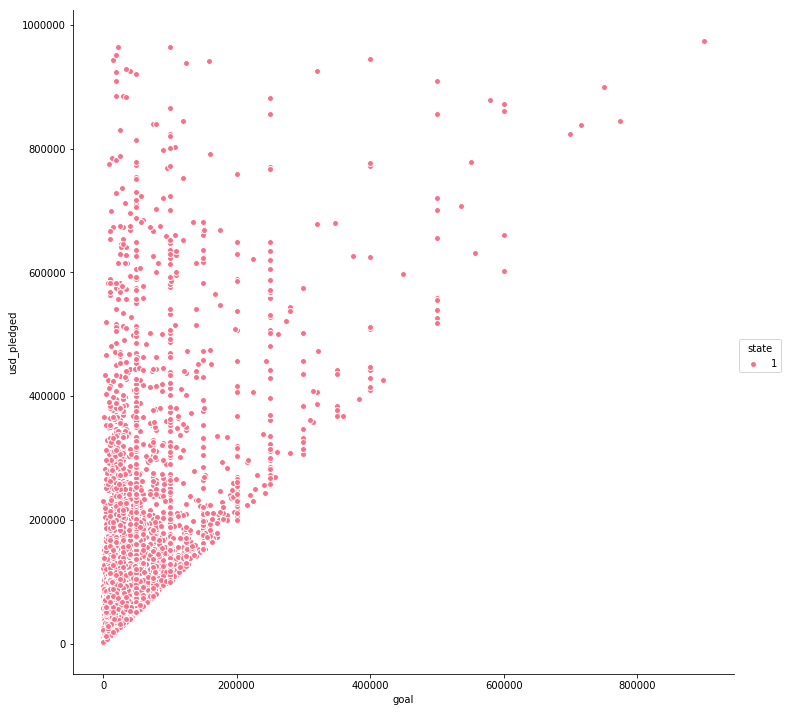

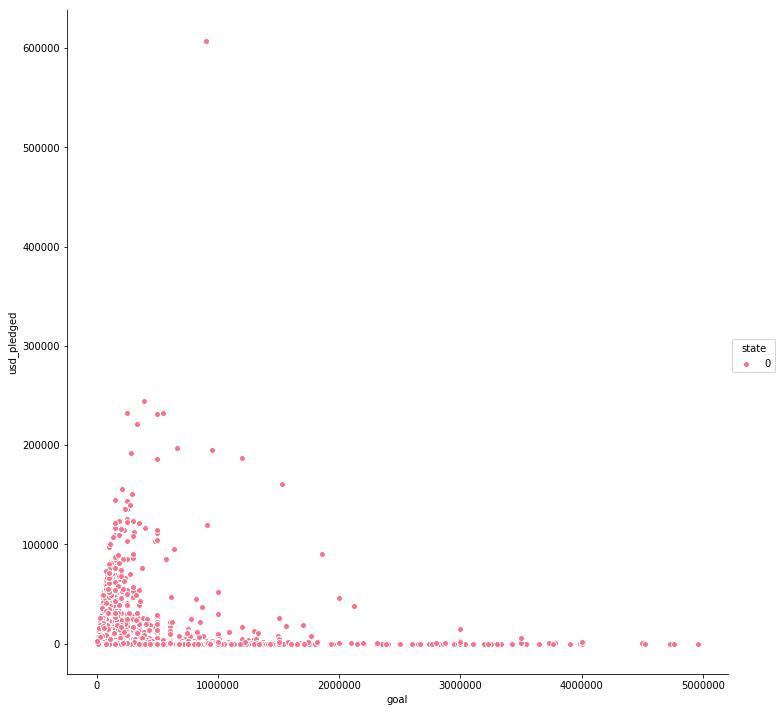

In [75]:
df.usd_pledged.describe()

df.usd_pledged.plot(figsize=(15,5))

#pledged > 1 mil
len(df.usd_pledged[df.usd_pledged > 1000000])

#pledged > 5 mil
len(df.usd_pledged[df.usd_pledged > 5000000])

# gained enough backing but still not successful
len(df[(df.usd_pledged >= df.goal) & (df.state == 0)])

# usd_pledged and goal, pledged under 1 mil
sns.pairplot(train_df[train_df.usd_pledged < 1000000], x_vars=['goal'], y_vars=['usd_pledged'], hue='state', palette='husl', aspect=5)
sns.pairplot(train_df[(train_df.state == 1) & (train_df.usd_pledged < 1000000)], x_vars=['goal'], y_vars=['usd_pledged'], hue='state', palette='husl', size=10)
sns.pairplot(train_df[(train_df.state == 0) & (train_df.usd_pledged < 1000000) & (train_df.goal < 5000000)], x_vars=['goal'], y_vars=['usd_pledged'], hue='state', palette='husl', size=10)

### blurb_length

- Blurb is a short description of the project, length 0 -- 35 words
- Most blurbs have 17 -- 23 words

TODO: standardize

count    168344.000000
mean         19.389559
std           4.797241
min           0.000000
25%          17.000000
50%          20.000000
75%          23.000000
max          35.000000
Name: blurb_length, dtype: float64

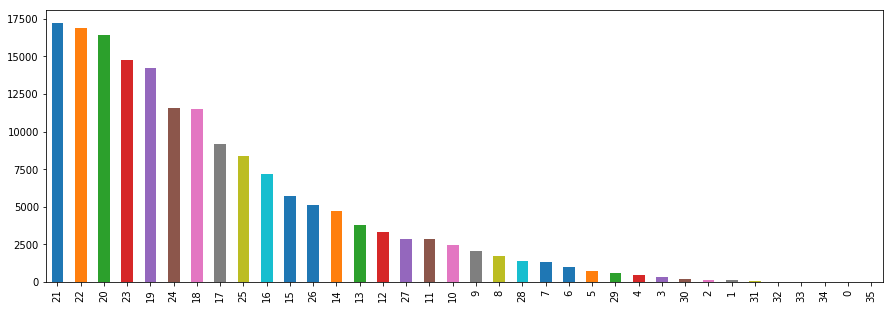

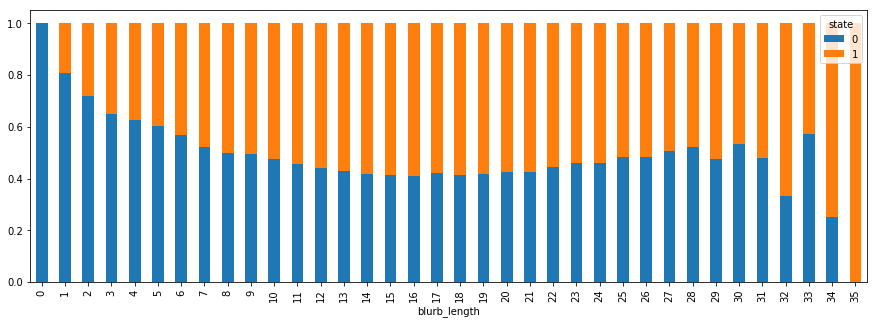

In [76]:
df.blurb_length.describe()

df.blurb_length.value_counts().plot.bar(figsize=(15,5))
pd.crosstab(train_df.blurb_length, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### duration

- Length of the project in days
- Duration varies between 0 and 92 days
- Majority of projects have a duration of 1 month (28-31 days)

TODO: standardize

count    168344.000000
mean         33.527117
std          12.706554
min           1.000000
25%          30.000000
50%          30.000000
75%          35.000000
max          92.000000
Name: duration, dtype: float64

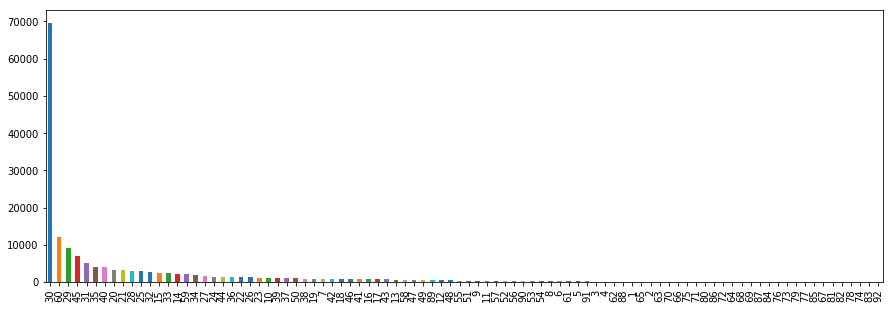

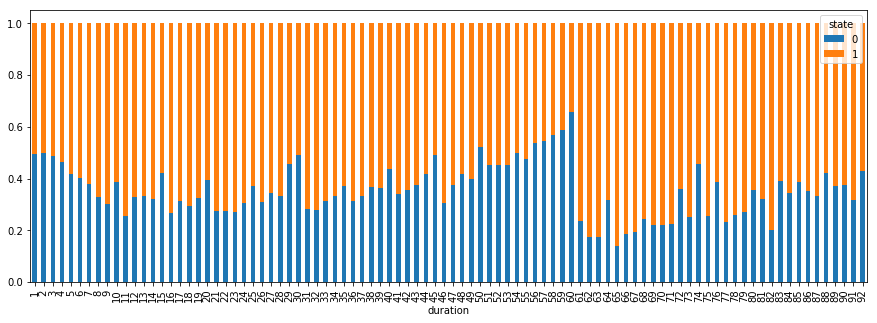

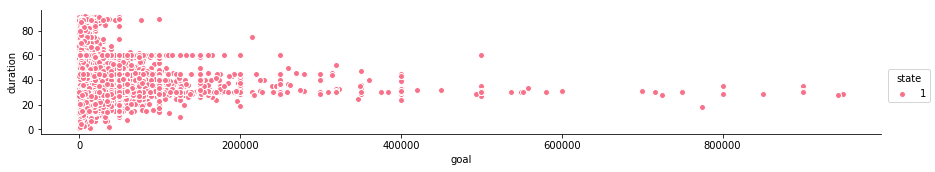

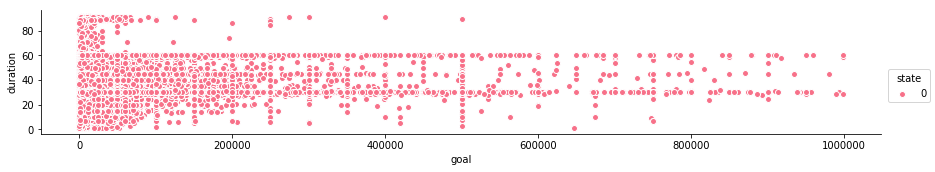

In [77]:
df.duration.describe()

df.duration.value_counts().plot.bar(figsize=(15,5))

pd.crosstab(train_df.duration, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

# goal vs. duration is successful and failed projects, with some outliers removed
sns.pairplot(df[(df.state == 1) & (df.goal < 1000000)], x_vars=['goal'], y_vars=['duration'], hue='state', palette='husl', aspect=5)
sns.pairplot(df[(df.state == 0) & (df.goal < 1000000)], x_vars=['goal'], y_vars=['duration'], hue='state', palette='husl', aspect=5)

### category

- Category of the project
- Dataset has a maximum of 2400 projects per category which probably skews the data
 - Successful projects may be overrepresented in these categories
 - E.g. Most live projects are in `design/product design` category and in the train set all of them are successful <- not very likely in reality!

TODO: Grouping categories needed/useful?

count                 168344
unique                   168
top       publishing/fiction
freq                    2400
Name: category, dtype: object

publishing/fiction             2400
design/product design          2400
publishing/nonfiction          2400
music/country & folk           2400
music/pop                      2400
film & video/documentary       2400
technology/apps                2400
art/illustration               2400
publishing/art books           2400
music/classical music          2400
technology/web                 2400
film & video/narrative film    2400
fashion/accessories            2400
food/restaurants               2400
games/video games              2400
music/rock                     2400
publishing/children's books    2400
music/hip-hop                  2400
film & video/shorts            2400
fashion/apparel                2400
film & video/webseries         2400
art/mixed media                2400
games/tabletop games           2400
art/public art                 2400
technology/software            2400
technology/hardware            2400
music/indie rock               2400
comics/comic books          

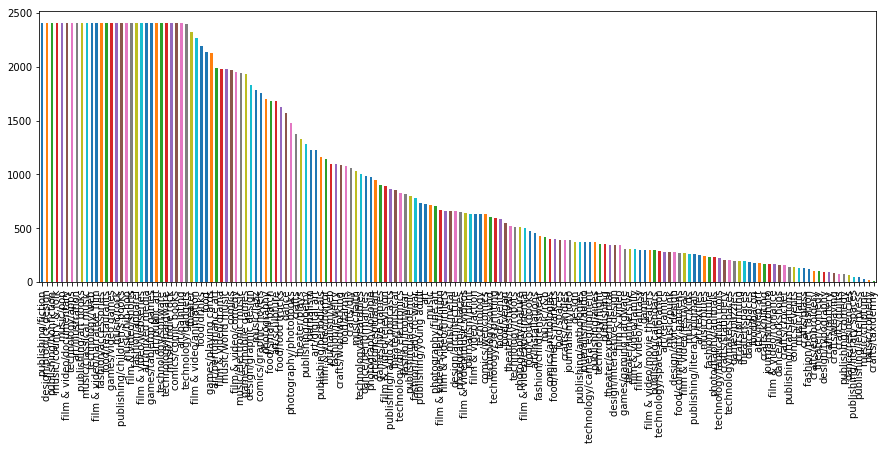

In [78]:
df.category.describe()

# number of unique values
df.category.value_counts()

# visualizing data
df.category.value_counts().plot.bar(figsize=(15,5))

design/product design    327
games/tabletop games     255
games/video games        148
fashion/accessories      130
art                      115
Name: category, dtype: int64

count    2073.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: state, dtype: float64

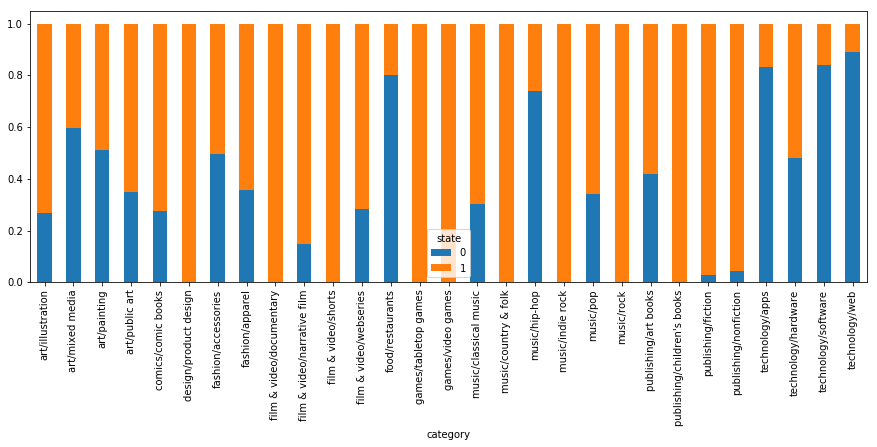

In [79]:
#keys of categories with 2400 projects
fullcats = df.category.value_counts().keys()[:29]

#plotting success vs. failure on these categories
pd.crosstab(train_df[train_df.category.isin(fullcats)].category, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

#categories with most live projects
df[df.state == 'live'].category.value_counts().head()

train_df[train_df.category == 'design/product design'].state.describe()

### country

- Country in which the project is taking place
- Clear majority are in the US

count     168344
unique        22
top           US
freq      133380
Name: country, dtype: object

US    133380
GB     14421
CA      6315
AU      3275
DE      1636
NL      1263
FR      1228
IT      1148
ES       904
SE       809
MX       785
NZ       621
DK       537
IE       364
NO       320
CH       302
BE       288
HK       251
AT       218
SG       208
JP        45
LU        26
Name: country, dtype: int64

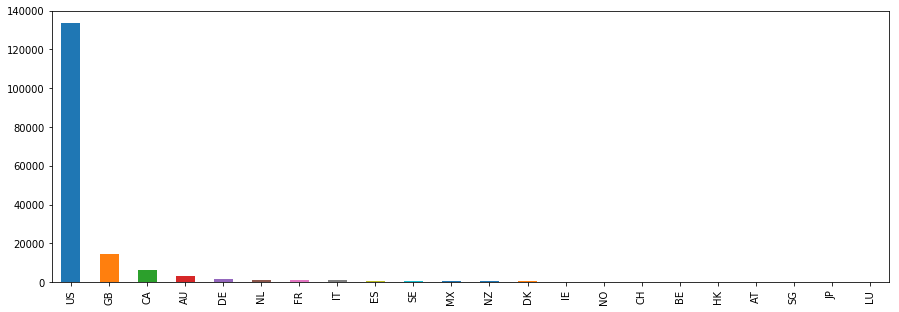

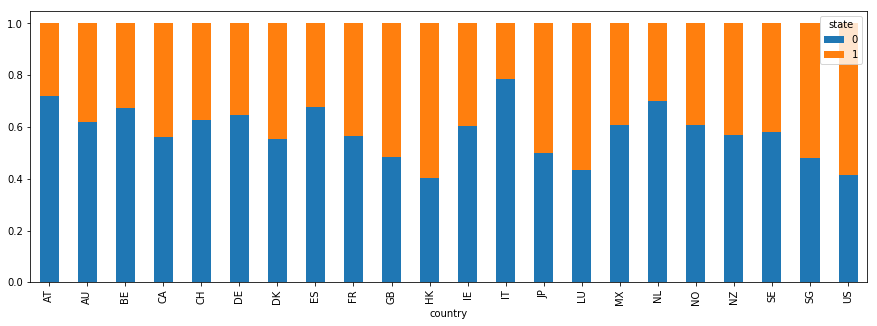

In [80]:
df.country.describe()
df.country.value_counts()

df.country.value_counts().plot.bar(figsize=(15,5))

pd.crosstab(train_df.country, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### currency

- In which currency the project is trying to gain backing
- Seems to go hand in hand with the project's country

count     168344
unique        14
top          USD
freq      133380
Name: currency, dtype: object

USD    133380
GBP     14421
EUR      7075
CAD      6315
AUD      3275
SEK       809
MXN       785
NZD       621
DKK       537
NOK       320
CHF       302
HKD       251
SGD       208
JPY        45
Name: currency, dtype: int64

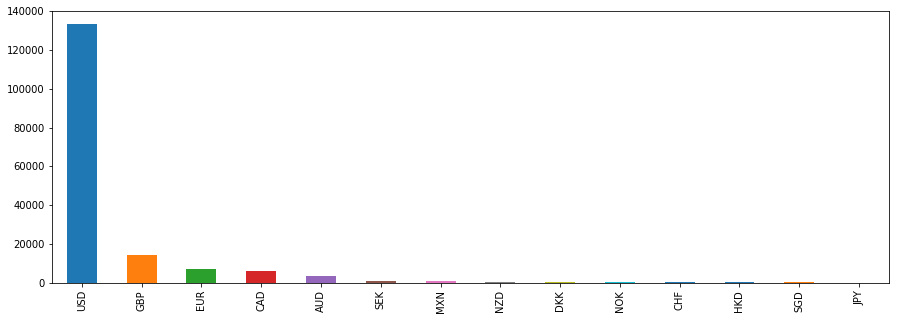

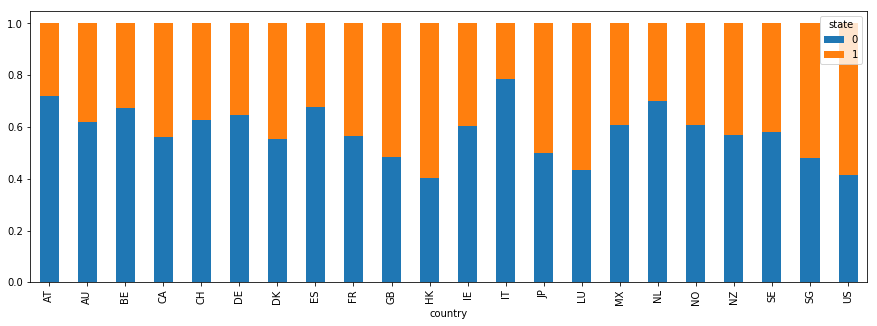

In [81]:
df.currency.describe()

df.currency.value_counts()

df.currency.value_counts().plot.bar(figsize=(15,5))

pd.crosstab(train_df.country, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

### disable_communication

- Are users able to communicate with project creator or not
- All projects in data have this at `False`

In [82]:
df.disable_communication.describe()

count     168344
unique         1
top        False
freq      168344
Name: disable_communication, dtype: object

### is_starrable

- Are users able to star projects in order to follow them
- None of the completed projects have this value as `True`, so this isn't a useful metric

In [83]:
df.is_starrable.describe()

# live projects and is_starrable
test_df.is_starrable.value_counts()

# number of starrable completed projects
len(train_df.is_starrable[train_df.is_starrable == True])


count     168344
unique         2
top        False
freq      164641
Name: is_starrable, dtype: object

True     3703
False     242
Name: is_starrable, dtype: int64

0

### staff_pick

- Whether or not the project was featured by Kickstarter staff

count     168344
unique         2
top        False
freq      146200
Name: staff_pick, dtype: object

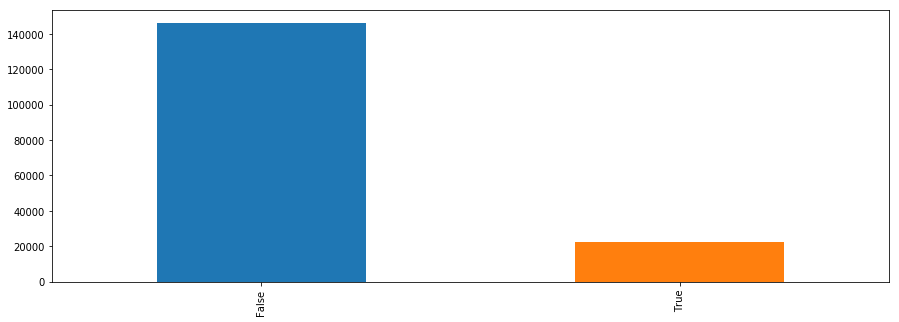

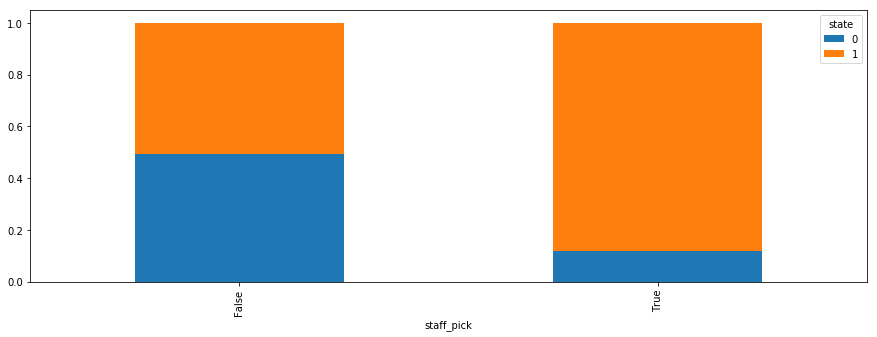

In [84]:
df.staff_pick.describe()

# visualize data
df.staff_pick.value_counts().plot.bar(figsize=(15,5))

# staff_pick and state
pd.crosstab(train_df.staff_pick, train_df.state, normalize="index").plot.bar(figsize=(15,5),stacked=True)

2003272.55

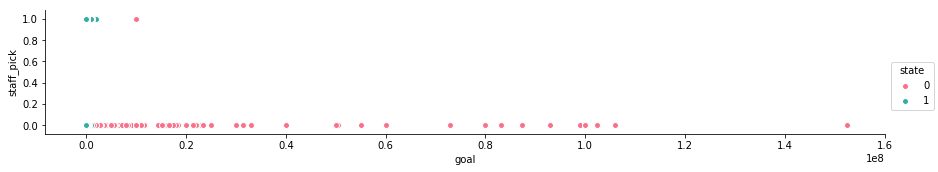

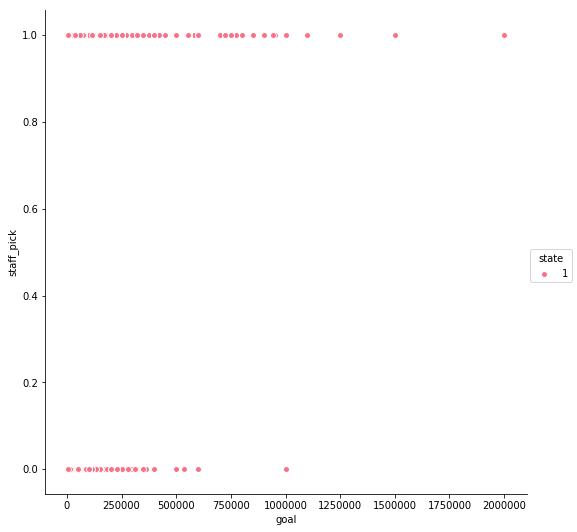

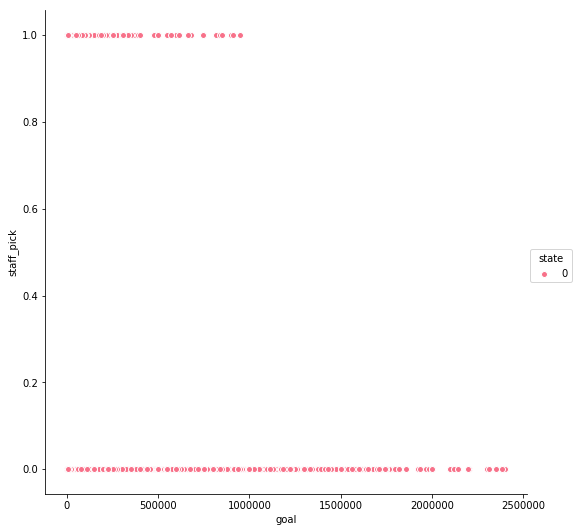

In [85]:
# staff_pick vs. goal

# what is the highest goal for a successful project that was a staff pick
max(train_df.goal[(train_df.staff_pick == 1) & (train_df.state == 1)])

sns.pairplot(train_df, y_vars=['staff_pick'], x_vars = ['goal'], hue='state', aspect=5, palette='husl')
sns.pairplot(train_df[(train_df.state == 1) & (train_df.goal < 2500000)], x_vars=['goal'], y_vars=['staff_pick'], hue='state', palette='husl', size=7.5)
sns.pairplot(train_df[(train_df.state == 0) & (train_df.goal < 2500000)], x_vars=['goal'], y_vars=['staff_pick'], hue='state', palette='husl', size=7.5)


### state

- If a project is Successful or if it's Cancelled/Failed/Suspended
- `1` if Successful, `0` for Failed projects, `live` for projects that are still ongoing. Cancelled and Suspended projects were excluded from the data
- Successful projects seem over-represented in the dataset

In [86]:
df.state.describe()

df.state.value_counts()

# highest goals of failed and successful projects
max(df.goal[df.state == 0])
max(df.goal[df.state == 1])
# most pledged on a successful project
max(df.usd_pledged[df.state == 1])

count     168344
unique         3
top            1
freq       91355
Name: state, dtype: int64

1       91355
0       73044
live     3945
Name: state, dtype: int64

152350076.0

2003272.55

10266845.74

### urls

- URLs associated with the given project
- Mostly used to recognize a specific project
 - Can be used to check the current status of the live project from the data

### location

- More accurate location for the project within the country it takes place in

In [87]:
df.location.describe()
df.location.value_counts().head()

count              168344
unique              13946
top       Los Angeles, CA
freq                 8534
Name: location, dtype: object

Los Angeles, CA      8534
New York, NY         7516
London, UK           4879
Chicago, IL          3682
San Francisco, CA    3295
Name: location, dtype: int64